## Load up data

In [13]:
# Remember to stack
# Check the shape of inputs, labels

In [14]:
#3a
import pandas as pd
import numpy as np
x1=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x1.csv")
x2=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x2.csv")
labels=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/labels.csv")
inputs=np.concatenate((x1,x2))
print("inputs:"+str(inputs))
print("Shape of inputs array:"+str(inputs.shape))
print("size of labels:"+str(len(labels)))


inputs:[[-0.2015173  -0.68335816]
 [ 0.37451947 -0.82808223]
 [-0.16189468 -1.24710655]
 ...
 [ 2.32559622  4.18132864]
 [ 0.24707288  4.22940428]
 [ 1.71902244  4.82535048]]
Shape of inputs array:(10000, 2)
size of labels:10000


## Visualize the data

In [15]:
# Assign different classes with different colors
# HINT: plt.plot might be slow for plotting- there are faster ways

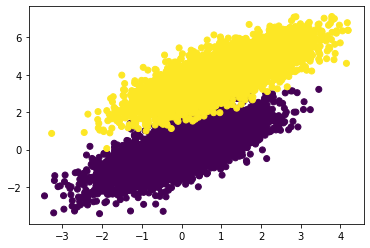

In [16]:
import matplotlib.pyplot as plt
P1=np.array(np.column_stack((inputs,labels)))
plt.scatter(P1[:,0],P1[:,1],c=P1[:,2])


## Log likelihood calculation

Write down the sigmoid and log-likelihood equations for logistic regression (use LaTeX to write equations)

Sigmoid Function:
$ h(x)=\frac{1}{(1+e^{-\theta^{T}x})}$

Log-Likelihood:
$l(\theta)=\sum\limits_{i=1}^{m}y^{(i)}\theta^{T}x^{(i)}-ln(1+e^{\theta^{T}x^{(i)}})$

Fill in the sigmoid and log-likelihood functions:

In [18]:
# Takes in value(s) and returns it's sigmoid value
def sigmoid(input_value): 
    sigma=1/(1+np.exp(-input_value))
    return sigma

In [19]:
# Takes in arguments and returns log-likelihood
def log_likelihood(inputs, labels, weights): 
    weights=np.reshape(weights,(1,3))
    ones=np.ones((10000, 1))
    N=len(labels)
    Inputs_x=np.column_stack((ones,inputs)).T
    thetax=np.dot(weights,Inputs_x)
    thetaTx=thetax.T
    L=np.sum(np.multiply(labels,thetaTx)-np.log(1+np.exp(thetaTx)))
    return L
print(log_likelihood(inputs, labels, [1,3,4]))

0   -16434.078336
dtype: float64


## Logistic Regression

Write down the gradient of the log-likelihood with respect to the weights (using LateX and then fill in the function)


Gradient of Log-Likelihood
$ \frac{dl(\theta)}{d\theta}=\sum\limits_{i=1}^{m}(y^{(i)}-h(x^{(i)}))x^{(i)}_{j}$

In [20]:
def logistic_regression(inputs, labels, num_steps, learning_rate):
    # inputs: N * 2 dimensional array
    # labels: N dimensional array
    # num_steps: Number of steps of gradient descent
    # learning_rate: associated with gradient descent
    N=len(labels)
    weights=np.array([1,2,3])
    print(weights.shape)
    ones=np.ones((N, 1)) 
    inputs_x=np.column_stack((ones,inputs)) 
    print(inputs_x.shape)
    for i in range(num_steps):
        thetax=np.dot(inputs_x,weights)
        print(thetax)
        Y_cap=sigmoid(thetax)
        Y_cap=np.asarray(Y_cap).reshape((N,1))
        labels=np.asarray(labels).reshape((N,1))
        diff=Y_cap-labels
        print(diff.shape)
        grad=np.dot(np.transpose(inputs_x),diff)
        gradT=grad.T
        weights=weights+learning_rate*gradT
        L=log_likelihood(inputs, labels, weights)
        return weights

print(logistic_regression(inputs, labels, 5, 5e-5))

(3,)
(10000, 3)
[-1.45310909 -0.73520777 -3.06510899 ... 18.19517836 14.18235862
 18.91409633]
(10000, 1)
[[1.14645998 2.08525559 3.08794372]]


## Weight calculation and Accuracy
Calculate the weights for the parameters: num_steps = 50000, learning_rate = 5e-5, and print the weights


In [21]:
import pandas as pd
import numpy as np
x1=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x1.csv")
x2=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x2.csv")
labels=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/labels.csv")
inputs=np.concatenate((x1,x2))
num_steps = 50000
learning_rate = 5e-5
N=len(labels)
weights=logistic_regression(inputs,labels,num_steps,learning_rate)
print(weights)
weights=weights.reshape((3,1))
ones=np.ones((N, 1))
inputs_x=np.column_stack((ones,inputs))
thetax=np.dot(inputs_x,weights)
thetaTx=thetax.T
Y_cap2=sigmoid(thetaTx)
Y_cap2_rounded=np.round(Y_cap2)
Y_cap2_rounded=np.asarray((Y_cap2_rounded)).reshape((N,1))
correct_prediction=0
checker=list()
Comparison=np.equal(Y_cap2_rounded,labels)
inputs_xc=np.column_stack((inputs_x,Comparison))
Correct_prediction=np.sum(Comparison)
Model_accuracy=(Correct_prediction/len(labels))*100
print("Model_accuracy is:"+str(Model_accuracy))

(3,)
(10000, 3)
[-1.45310909 -0.73520777 -3.06510899 ... 18.19517836 14.18235862
 18.91409633]
(10000, 1)
[[1.14645998 2.08525559 3.08794372]]
Model_accuracy is:0    69.83
dtype: float64


## Visualizing mispredictions with your Model

In [22]:
# Plot the inputs and differentiate the mispredicted points by plotting them with different color. 

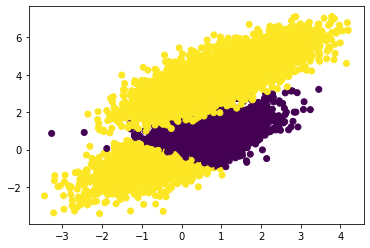

In [23]:
input_value=np.dot(inputs_x,weights)
Y_cap3=np.round(sigmoid(input_value))
plt.scatter(inputs_xc[:,1],inputs_xc[:,2],c=inputs_xc[:,3])

## Comparision with sklearn and Accuracy

In [24]:
# Write your code here
import numpy as np
import pandas as pd
x1=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x1.csv")
x2=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/x2.csv")
labels=pd.read_csv("D:/CMU_Sem1_books_notes/AI_Machine_Learning/hw2/hw2/q3-data/labels.csv")
inputs=np.concatenate((x1,x2))

from sklearn.linear_model import LogisticRegression

Logistic_regression=LogisticRegression(fit_intercept=True,solver="liblinear")
Logistic_regression.fit(inputs,labels)
print(weights)

[[1.14645998]
 [2.08525559]
 [3.08794372]]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Calculate the accuracy of the labels obtained from sklearn
# Compare the two sets of accuracies
accuracy_Sk=Logistic_regression.score(inputs,labels)*100
print("Accuracy using sklearn is:"+str(accuracy_Sk))

Accuracy using sklearn is:99.5


The accuracy of logistic regression model using sklearn is 29.67% higher than the hand-built model. The accuracy of the hand-built model can be improved by changing the learning rate